In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

def generate_image(shape):
    image = np.zeros((64, 64, 3), dtype=np.uint8)
    if shape == 0:  # Square
        cv2.rectangle(image, (20, 20), (44, 44), (255, 255, 255), -1)
    elif shape == 1:  # Circle
        cv2.circle(image, (32, 32), 12, (255, 255, 255), -1)
    elif shape == 2:  # Triangle
        points = np.array([[32, 20], [20, 44], [44, 44]])
        cv2.drawContours(image, [points], 0, (255, 255, 255), -1)
    return image

# Generate dataset
num_images = 300
X = np.zeros((num_images, 64, 64, 3), dtype=np.uint8)
y = np.zeros((num_images,), dtype=np.int32)

for i in range(num_images):
    shape = np.random.randint(0, 3)
    X[i] = generate_image(shape)
    y[i] = shape

# add dataset from kaggle Car and Swimming pool (Satellite imagery)
# https://www.kaggle.com/olgabelitskaya/semantic-segmentation-of-satellite-images
# https://www.kaggle.com/olgabelitskaya/carvana-image-masking-challenge
# https://www.kaggle.com/olgabelitskaya/swimming-pool
# https://www.kaggle.com/olgabelitskaya/combined-car-and-swimming-pool
    
# Load the dataset from ./../geodeep/yolov4-tiny/



# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


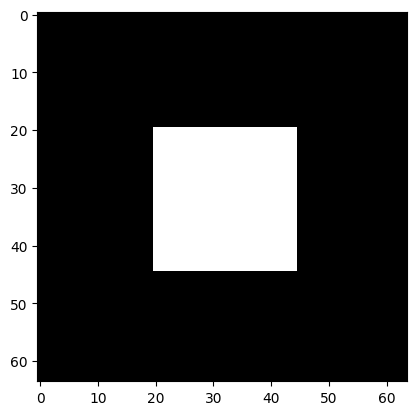

In [4]:
from matplotlib import pyplot as plt

# show above image
plt.imshow(X[0])
plt.show()



In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

In [3]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10


2024-04-03 17:25:01.000606: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 45ms/step - loss: 28.9166 - accuracy: 0.6771 - val_loss: 2.1607e-06 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 32ms/step - loss: 5.2775e-08 - accuracy: 1.0000 - val_loss: 3.4769e-08 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 5.5879e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accura

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


2/2 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 31ms/epoch - 15ms/step

Test accuracy: 1.0
